In [138]:
# importiing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [139]:
# to hide any runtime warnings
import warnings
warnings.filterwarnings('ignore')

In [140]:
# loading the dataset
df = pd.read_csv("heart_attack.csv")

# checking the head of the dataset
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [141]:
# checking how many rowa and columns our dataset has

print(f'''
The dataset has {df.shape[0]} rows and {df.shape[1]} columns
''')


The dataset has 8763 rows and 26 columns



----

As we have we have 26 columns in our dataset but we are unable to view the whole dataset at once, so I am using pandas options to view the whole dataset

---

In [142]:
# to get all the columns of the dataset
pd.set_option('display.max_columns', None)

In [143]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [144]:
# checking the column names of the dataset
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [145]:
# checking the datatypes of each column in our dataset

for col in df.columns:
    print(f"'{col}' : {df[col].dtype}")

'Patient ID' : object
'Age' : int64
'Sex' : object
'Cholesterol' : int64
'Blood Pressure' : object
'Heart Rate' : int64
'Diabetes' : int64
'Family History' : int64
'Smoking' : int64
'Obesity' : int64
'Alcohol Consumption' : int64
'Exercise Hours Per Week' : float64
'Diet' : object
'Previous Heart Problems' : int64
'Medication Use' : int64
'Stress Level' : int64
'Sedentary Hours Per Day' : float64
'Income' : int64
'BMI' : float64
'Triglycerides' : int64
'Physical Activity Days Per Week' : int64
'Sleep Hours Per Day' : int64
'Country' : object
'Continent' : object
'Hemisphere' : object
'Heart Attack Risk' : int64


---

Our datatset has 7 columns with object datatype                           

| column name | datatype |
| --- | --- |
| Patient ID | object |
| Sex | object |
| Blood Pressure | object |
| Diet | object |
| Country | object |
| Continent | object |
| Hemisphere | object |


Other 19 columns has numerical datatype

---


In [146]:
# checking for descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


---

- The mean age in our datatset is 53. And the mean Heart Rate is 75 while the maximum Heart Rate is 110.
- On an average a person spends 10 hours perweek in the gym.
- The mean BMI is 28 which is considered as overweight in most cases and the maximum BMI is 39.
- On an avearge a person spends almost 6 hours a day is sedentary (sitting or lying down) while maximum people spends around 12 hours a day in sedentry.

---


### **Data Cleaning**

In [147]:
# checking the exatc name of the columns
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

---

As I have noticed that the column names in our dataset are not following the standard naming convention, so I am renaming the columns

- The operation is as follows:
  
  - first I am converting the column names in to lower case
  - Second, I am replacing the spaces in the column names with underscores

---

In [148]:
# conver the column names to lowercase
df.columns = df.columns.str.lower()

In [149]:
# replacing the spaces in the column names with underscores
df.columns = df.columns.str.replace(" ", "_")

# confirming the changes    
df.columns

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')

### Restricting the number of decimal places

In [150]:
# applying for loop to limit some columns up to 2 decimal places
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].apply(lambda x: round(x, 2))

# confirming the changes
df.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [151]:
# checking for any null values in the dataset
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
dtype: int64

----

Our dataset has no null values in all the columns

---

In [152]:
# check for duplicates in the dataset
print(f'The duplicates values in our dataset is: {df.duplicated().any()}')

The duplicates values in our dataset is: False


----

Our dataset has no duplicates


---

### **Feature Engineering**

In [153]:
# confirming the datatype of `blood_pressure` column
print(f"The datatype of `blood_pressure` column is:  {df['blood_pressure'].dtype}")

The datatype of `blood_pressure` column is:  object


---

- As we can see that dataype of `blood_pressure` column is `object`. 
- So to use this in further analysis we need to extract the `systolic` and `diastolic` values from the `blood_pressure` column.

---

In [154]:
# converting this column to string
df['blood_pressure'] = df['blood_pressure'].astype(str)

# extracting the systolic and diastolic values from the `blood_pressure` column and converting them to integers
df['systolic'] = df['blood_pressure'].str.split('/').str[0].astype('int64')
df['diastolic'] = df['blood_pressure'].str.split('/').str[1].astype('Int64')

In [155]:
# confirming the changes

# checking the datatype of `systolic` and `diastolic` columns
for col in df.columns:
    if col == 'systolic' or col == 'diastolic':
        print(f"{col} : {df[col].dtype}")

systolic : int64
diastolic : Int64


---

### **Exploratory Data Analysis (EDA) & Data Visualization**

#### **exploring the `sex` column**

In [156]:
# checking for unique values in `sex` column
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [157]:
# check for the presence of male and female in the dataset
df['sex'].value_counts()

sex
Male      6111
Female    2652
Name: count, dtype: int64

In [158]:
def bar_plot():
    ''''
    Defining a function to plot a bar plot of the percentage of gender in our dataset
    '''
    # percentage of male and female in the dataset
    gender_percentage = df['sex'].value_counts(normalize=True) * 100
    
    # defining the figure size
    plt.figure(figsize=(10, 6))
    
    # plotting the bar plot of gender percentage
    plt.bar(gender_percentage.index, gender_percentage, color=['navy', 'purple'], alpha=0.7, edgecolor='black', linewidth=2)
    
    # setting the title of the plot
    plt.title('Percentage of Male and Female in the Dataset')
    
    # formatting the x and y labels
    plt.ylabel('Percentage', fontsize=12, fontweight='bold')
    plt.xlabel('Gender', fontsize=12, fontweight='bold')
    
    # formatting the xticks and yticks
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')
    
    # rotating the alignment of the xticks
    plt.xticks(rotation=0)
    
    plt.show()
    
    return

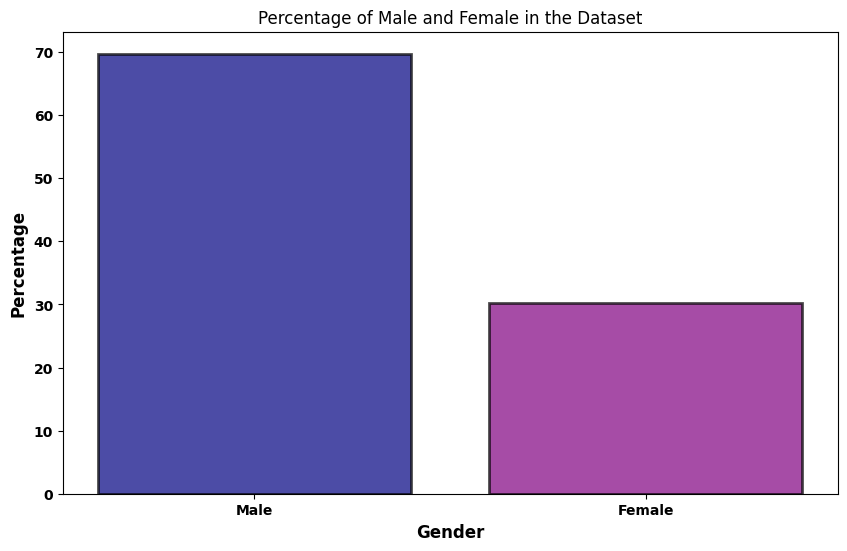

In [159]:
# calling the function
bar_plot()

In [160]:
# mean age of both genders in the dataset

df.groupby('sex')['age'].agg(['mean', 'max'])

,mean,max
sex,,
Female,53.060709,90
Male,53.988873,90


----
- So in our dataset we have 6111 males and 2652 females out of 8763 people which are approxilamately 69.5% and 30.5% respectively.
- The mean age of both genders is 53 years and the maximum age of both genders is 90.

---

#### **exploring the `cholesterol` column in relation to the `sex` column**

In [161]:
# cholesterol of both genders in the dataset

df.groupby('sex')['cholesterol'].agg(['mean','std', 'min','max']).round(2)

,mean,std,min,max
sex,,,,
Female,258.94,80.55,120,400
Male,260.28,81.00,120,400


----

- From the above results it is clear that the mean and standard deviation of cholestrol is just a bit higher in males than females.
- Although the max and min values of cholestrol is same for both genders.

---


#### **exploring the `heart_rate` column in relation to the `sex & family_history` column**

In [162]:
# heart rate of both genders in the dataset
df.groupby('sex')['heart_rate'].agg(['mean','std', 'min','max']).round(2)

,mean,std,min,max
sex,,,,
Female,75.36,20.64,40,110
Male,74.87,20.51,40,110


In [163]:
# checking for unique values in `family_history` column
df['family_history'].unique()

array([0, 1], dtype=int64)

In [164]:
# checking value counts in `family_history` column
df['family_history'].value_counts()

family_history
0    4443
1    4320
Name: count, dtype: int64

In [165]:
# catagorizing further `sex` and `family_history` columns
df.groupby('sex')['family_history'].value_counts()

sex     family_history
Female  0                 1349
        1                 1303
Male    0                 3094
        1                 3017
Name: count, dtype: int64

In [166]:
# heart rate of both genders in the dataset in response to family history
df.groupby(['sex', 'family_history'])['heart_rate'].mean().round(2)

sex     family_history
Female  0                 76.22
        1                 74.48
Male    0                 74.89
        1                 74.85
Name: heart_rate, dtype: float64

### Bar Plot

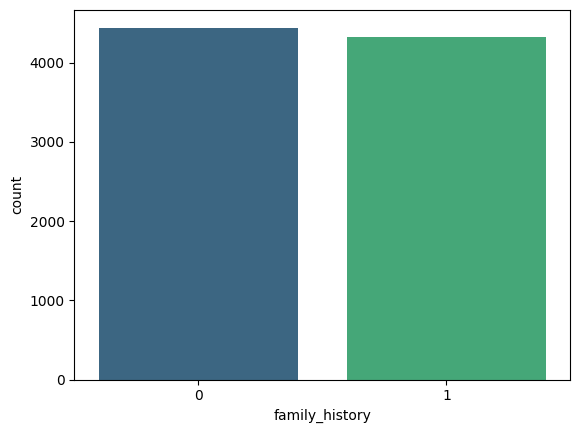

In [167]:
# make a count plot of `family_history` column
sns.countplot(x='family_history', data=df, palette='viridis')
plt.show()

----

- `4443` enteries in our dataset has `family_history` value of `no` whereas `4320` indicies has `family_history` value of `yes`.
- The average heart rate average in female is slightly higher than the average heart rate average in male.
- If we do some deeper analysis we can see that the average heart rate for the female with no previous family history is 2 points higer than of other female and male catagories.

---

#### **exploring the `obesity` and `diabetes` columns and their relationship with gender**

In [168]:
# checking the value counts of diabetes in the dataset
df['diabetes'].value_counts()

diabetes
1    5716
0    3047
Name: count, dtype: int64

In [169]:
# checking value counts in `diabetes` column
df.groupby('sex')['diabetes'].value_counts()

sex     diabetes
Female  1           1723
        0            929
Male    1           3993
        0           2118
Name: count, dtype: int64

### Pie Chart

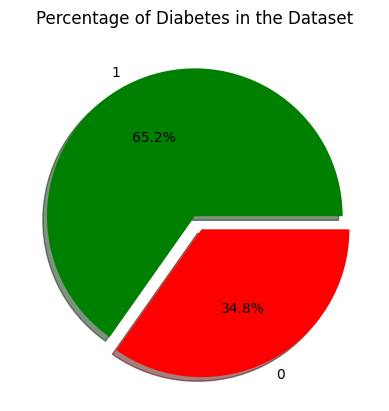

In [170]:
# make a pie chart of `diabetes` column
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red'], explode=[0, 0.1], shadow=True)
plt.title('Percentage of Diabetes in the Dataset')
plt.ylabel('')
plt.show()

In [171]:
# checking the value counts of `obesity` in the dataset
df['obesity'].value_counts()

obesity
1    4394
0    4369
Name: count, dtype: int64

In [172]:
# checking value counts in `obesity` column
df.groupby('sex')['obesity'].value_counts()

sex     obesity
Female  0          1327
        1          1325
Male    1          3069
        0          3042
Name: count, dtype: int64

---

- In our dataset we have relatively large number of people who are `diabetic`. By looking further we get an idea that in both male and female the diabetic count is very large
- For female it is `1723` whereas for male it is `3993`
- Whereas the valeu countsof obesity and non obeisty id almost same for both genders

---


#### exploring the `exercise_hours_per_week` column in relation to the `sex` column

In [173]:
df.groupby(['sex', 'obesity', 'diabetes'])['exercise_hours_per_week'].count()

sex     obesity  diabetes
Female  0        0            469
                 1            858
        1        0            460
                 1            865
Male    0        0           1077
                 1           1965
        1        0           1041
                 1           2028
Name: exercise_hours_per_week, dtype: int64

---

- From the above results it is clear that the number of males who are obese and also diabetic is much larger than the number of catagories.
- Feales who are obese and diabetic are double than the who are non diabteic.
----

### Box Plot

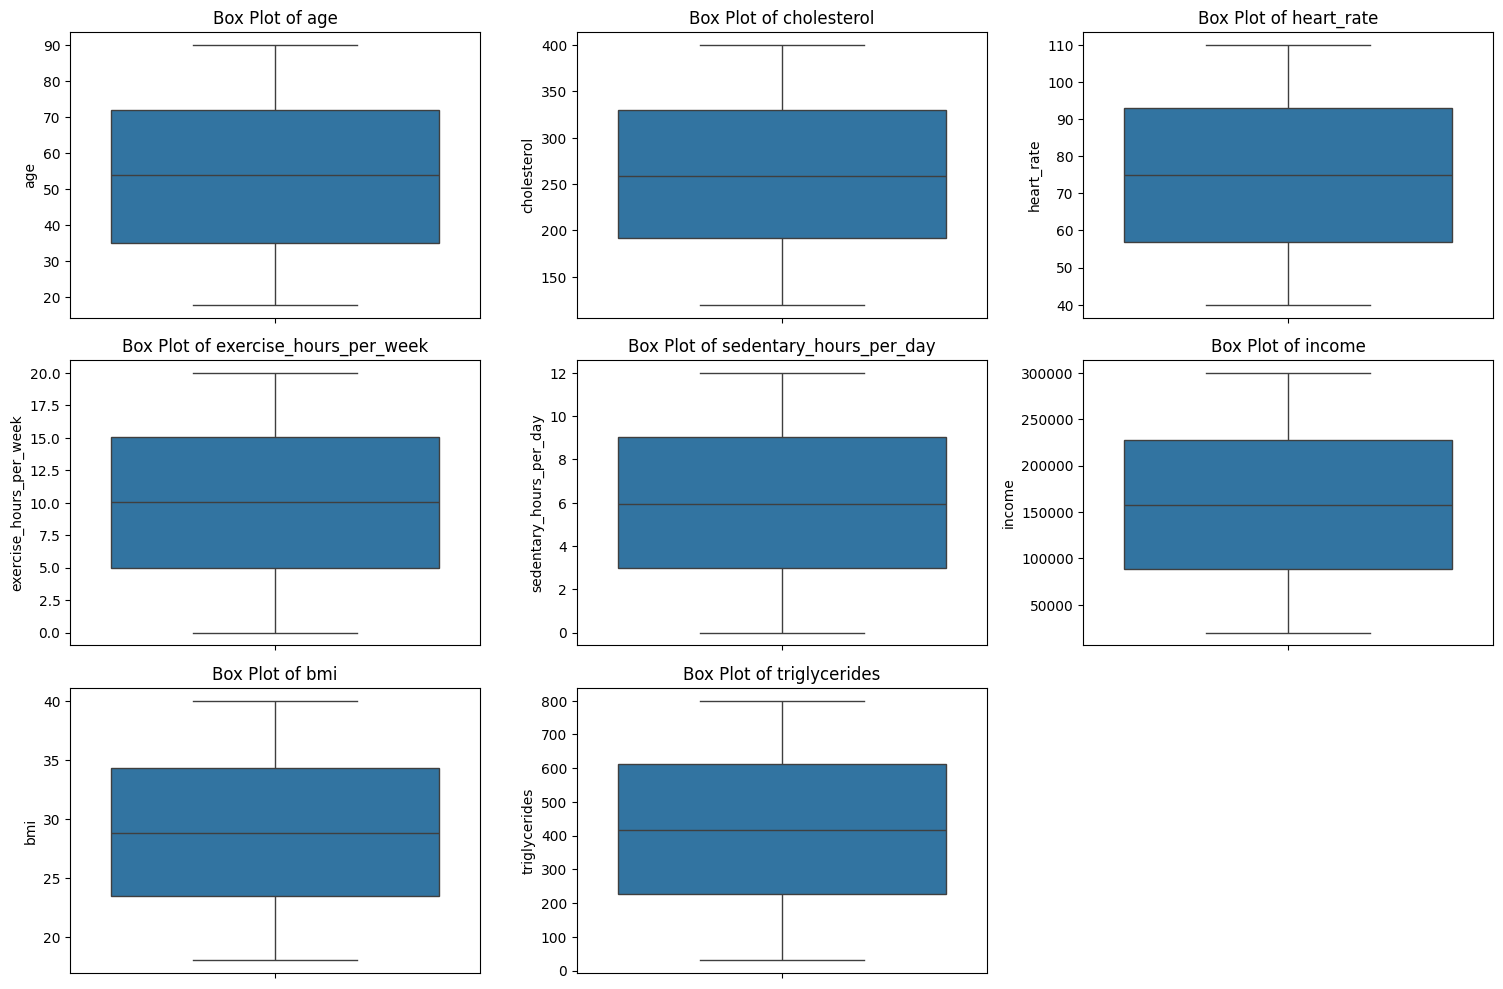

In [174]:
# Selecting the columns for the box plot
columns_to_plot = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 
                   'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides']

# Defining the number of rows and columns for subplots
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Plotting each column in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Histogram of Age

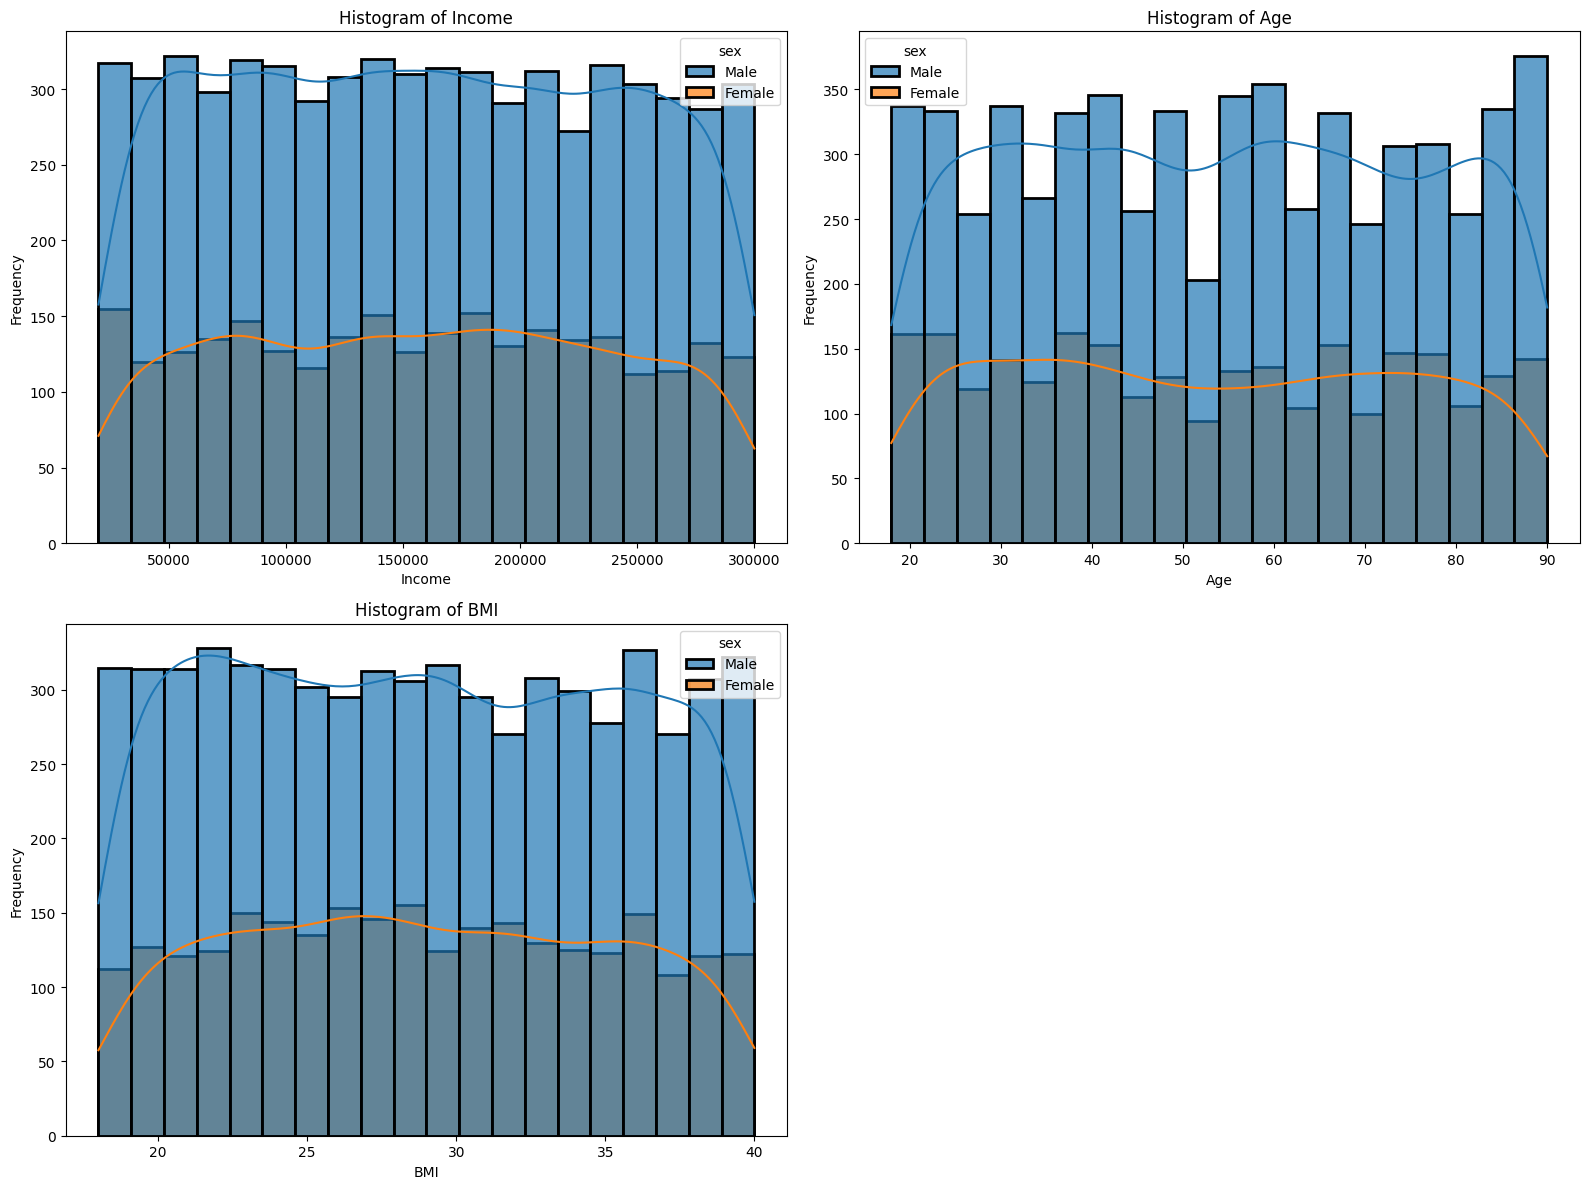

In [175]:
# Creating subplots for histograms of 'income', 'age', and 'bmi'
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flattening the axes array for easier indexing
axes = axes.flatten()

# Histogram for 'income'
sns.histplot(data=df, x='income', bins=20, kde=True, color='blue', hue='sex', ax=axes[0], edgecolor='black', linewidth=2, alpha=0.7)
axes[0].set_title('Histogram of Income')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')

# Histogram for 'age'
sns.histplot(data=df, x='age', bins=20, kde=True, color='green', hue='sex', ax=axes[1], edgecolor='black', linewidth=2, alpha=0.7)
axes[1].set_title('Histogram of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Histogram for 'bmi'
sns.histplot(data=df, x='bmi', bins=20, kde=True, color='red', hue='sex', ax=axes[2], edgecolor='black', linewidth=2, alpha=0.7)
axes[2].set_title('Histogram of BMI')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('Frequency')

# Hiding the unused subplot
fig.delaxes(axes[3])

# Adjusting layout
plt.tight_layout()
plt.show()


----

- The average heart rate for males is slightly higher than the average heart rate for females.
- The average age for males is slightly higher than the average age for females.
- Above histograms shows that distribution `age`, `income` & `bmi` are almost uniform fo both genders 
  

---

In [176]:
df['heart_attack_risk'].value_counts()

heart_attack_risk
0    5624
1    3139
Name: count, dtype: int64

----

- 0 represents no heart attack risk and 1 represents heart attack risk.
- There are 5624 entries with  no heart attack risk and 3139 entries with heart attack risk.
- The dataset is imbalanced which creates a bias in the model.

---

### **Data Preprocessing**

In [177]:
# dropping the column `blood_pressure` and patient_id
df.drop(['blood_pressure', 'patient_id'], axis=1, inplace=True)

df.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic,diastolic
0,67,Male,208,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


----

- We have dropped the columns `blood_pressure` and `patient_id` from the dataset as they are not useful in our machine learning model.
----

### **dividing the dataset into training and testing sets**

In [178]:
# dividing the dataset into features and target variable
X= df.drop('heart_attack_risk', axis=1)
y= df['heart_attack_risk']

In [179]:
# previewing the features
X.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,systolic,diastolic
0,67,Male,208,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,158,88
1,21,Male,389,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,165,93
2,21,Female,324,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,174,99
3,84,Male,383,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,163,100
4,66,Male,318,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,91,88


----

### **checking the variance inflation factor of the features**

----

In [180]:
# checking the variance inflation factor of the features


# Ensure all columns in X are numeric and convert non-standard numeric types to float
X_numeric = X.select_dtypes(include=[np.number]).astype(float)

# Create a dataframe to store the VIF of each feature
vif = pd.DataFrame()
# Add a column of feature names
vif['Features'] = X_numeric.columns
# Add the VIF of each feature
vif['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
# Round the VIF to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,age,8.64
1,cholesterol,10.65
2,heart_rate,13.10
3,diabetes,2.84
4,family_history,1.96
5,smoking,11.16
6,obesity,1.99
7,alcohol_consumption,2.47
8,exercise_hours_per_week,3.93
9,previous_heart_problems,1.97


**Interpretation:**

- **High Multicollinearity Detected:**

  - heart_rate (13.1), smoking (11.16), and cholesterol (10.65) have VIF > 10, indicating severe multicollinearity.
These features are strongly correlated with other predictors.

- **Moderate Multicollinearity:**

  - age (8.64), diabetes (2.84), and alcohol_consumption (2.47) have VIF values between 2-10, suggesting moderate correlation.
While not as severe, some of these features might still contribute to redundancy.

- **Low Multicollinearity (Acceptable Range):**

- sex (1.99), family_history (1.96), obesity (1.99), exercise_hours_per_week (3.93), and previous_heart_problems (1.97) have VIF < 5, indicating low multicollinearity.
These features do not pose a serious issue in the model.


### Min Max Scalar:

In [181]:
# performing scaling the data using standard scaler

from sklearn.preprocessing import MinMaxScaler

# instantiating the standard scaler

scaler = MinMaxScaler()

# scaling the numerical columns
X[['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides']] = scaler.fit_transform(
	X[['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides']]
)

### **Performing Hot Encoding on Categorical Column**

In [182]:
# performing one hot encoding on the dataset

X = pd.get_dummies(X, columns=['sex', 'diet', 'country', 'continent', 'hemisphere'], drop_first=True)


In [183]:
# checking the head of the features after label encoding
X.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,systolic,diastolic,sex_Male,diet_Healthy,diet_Unhealthy,country_Australia,country_Brazil,country_Canada,country_China,country_Colombia,country_France,country_Germany,country_India,country_Italy,country_Japan,country_New Zealand,country_Nigeria,country_South Africa,country_South Korea,country_Spain,country_Thailand,country_United Kingdom,country_United States,country_Vietnam,continent_Asia,continent_Australia,continent_Europe,continent_North America,continent_South America,hemisphere_Southern Hemisphere
0,0.680556,0.314286,0.457143,0,0,1,0,0,0.2085,0,0,9,0.551667,0.862268,0.602273,0.332468,0,6,158,88,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,0.041667,0.960714,0.828571,1,1,1,1,1,0.0905,1,0,1,0.413333,0.949316,0.417727,0.266234,1,7,165,93,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0.041667,0.728571,0.457143,1,0,0,0,0,0.1040,1,1,9,0.788333,0.768939,0.462727,0.723377,4,4,174,99,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,0.916667,0.939286,0.471429,1,1,1,0,1,0.4915,1,0,9,0.637500,0.377210,0.839091,0.451948,3,4,163,100,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0.666667,0.707143,0.757143,1,1,1,1,0,0.2900,1,0,6,0.125833,0.501954,0.173182,0.261039,1,5,91,88,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


---

### **Splitting the dataset into training and testing sets**

---

In [184]:
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [185]:
# checking the shape of the training and testing sets
print(f'''
The training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns
The testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns
''')


The training set has 6134 rows and 48 columns
The testing set has 2629 rows and 48 columns



---

### **Building a Random Forest Classifier**

---

In [186]:
# instantiating the random forest classifier
rf = RandomForestClassifier()

In [187]:
# fitting the model on the training set
rf.fit(X_train, y_train)


RandomForestClassifier()

In [188]:
# making predictions on the testing set
y_pred = rf.predict(X_test)


In [189]:
# checking the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.6424496006085965


In [190]:
# checking the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      1691
           1       0.47      0.02      0.03       938

    accuracy                           0.64      2629
   macro avg       0.56      0.50      0.41      2629
weighted avg       0.58      0.64      0.51      2629



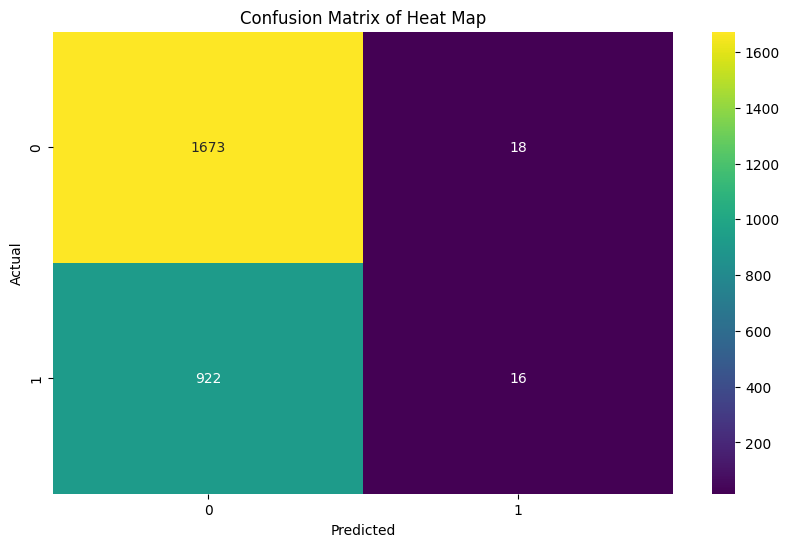

In [191]:
# checking the confusion matrix
confusion_matrix(y_test, y_pred)
# plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Heat Map')
plt.show()

---

- confusion matrix shows the number of correct and incorrect predictions for each class.
- it tells us the number of true positives, true negatives, false positives, and false negatives.
- from the above results it is clear that model is not performing well on the testing set. As due to class imbalance it misclassifies the data.
- As this model idetifies 920 records which is a larger number
  
---

----

### **Dealing with Class Imbalance**

---

In [192]:
df.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic,diastolic
0,67,Male,208,72,0,0,1,0,0,4.17,Average,0,0,9,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.81,Unhealthy,1,0,1,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.08,Healthy,1,1,9,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.83,Average,1,0,9,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.80,Unhealthy,1,0,6,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [193]:
df.dtypes

age                                  int64
sex                                 object
cholesterol                          int64
heart_rate                           int64
diabetes                             int64
family_history                       int64
smoking                              int64
obesity                              int64
alcohol_consumption                  int64
exercise_hours_per_week            float64
diet                                object
previous_heart_problems              int64
medication_use                       int64
stress_level                         int64
sedentary_hours_per_day            float64
income                               int64
bmi                                float64
triglycerides                        int64
physical_activity_days_per_week      int64
sleep_hours_per_day                  int64
country                             object
continent                           object
hemisphere                          object
heart_attac

### **Label Encoding**

In [194]:
# selecting object columns from the dataset
object_col = df.select_dtypes(include='object').columns
# defining the label encoder
le = LabelEncoder()
# defining the for loop for label encoding
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [195]:
df.head()

,age,sex,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,diet,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic,diastolic
0,67,1,208,72,0,0,1,0,0,4.17,0,0,0,9,6.62,261404,31.25,286,0,6,0,5,1,0,158,88
1,21,1,389,98,1,1,1,1,1,1.81,2,1,0,1,4.96,285768,27.19,235,1,7,3,4,0,0,165,93
2,21,0,324,72,1,0,0,0,0,2.08,1,1,1,9,9.46,235282,28.18,587,4,4,6,3,0,0,174,99
3,84,1,383,73,1,1,1,0,1,9.83,0,1,0,9,7.65,125640,36.46,378,3,4,3,4,0,0,163,100
4,66,1,318,93,1,1,1,1,0,5.80,2,1,0,6,1.51,160555,21.81,231,1,5,16,1,0,0,91,88


### **Applying SMOTE to deal with class imbalance**

In [196]:

# Define features and target
X_resample = df.drop('heart_attack_risk', axis=1)
y_resample = df['heart_attack_risk']

# Ensure all columns are float64
X_resample = X_resample.astype(float)

# Split data
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(
    X_resample, y_resample, test_size=0.2, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_resample, y_train_resample)


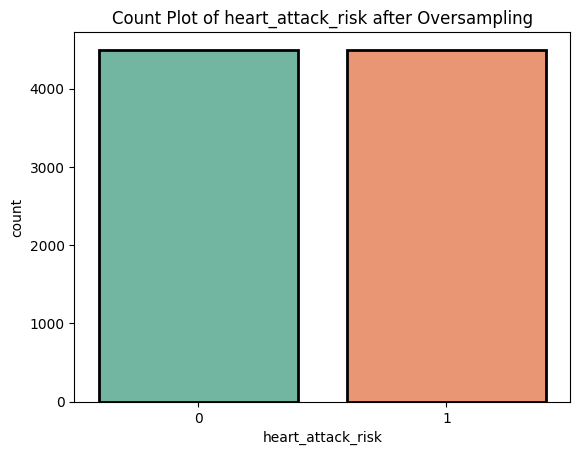

In [197]:
# plotting the count plot
sns.countplot(x=y_train_resample , palette='Set2' , edgecolor='black' , linewidth=2 )
plt.title('Count Plot of heart_attack_risk after Oversampling')
plt.show()

### Insights after oversampling

In [198]:
before_sampling = X_resample.shape[0]
print (f"Number of rows before SMOTE: {before_sampling} \n")

after_sampling = X_train_resample.shape[0] + X_test_resample.shape[0]

print (f"Number of rows after SMOTE: {after_sampling} \n")

increase_in_rows =  after_sampling - before_sampling
print(f"Increase in number of rows after SMOTE: {increase_in_rows}")

Number of rows before SMOTE: 8763 

Number of rows after SMOTE: 10751 

Increase in number of rows after SMOTE: 1988


### **Concatenating the data**

In [199]:

# dropping highly correlated features from the independent resampled training & testing data
X1 = X_train_resample
X2 = X_test_resample

# concatenating the independent testing and training data
X_resampled = pd.concat([X1 , X2] , axis=0)

# concatenating the dependent testing and training data
y1 = y_train_resample
y2 = y_test_resample

y_resampled = pd.concat([y1 , y2] , axis=0)


### **Again Applying Random Forest Classifier on the resampled data**

In [200]:

# Splitting the resampled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)


In [201]:
# Evaluating the model
print(f'Accuracy Score:{accuracy_score(y_test, y_pred)}')

(confusion_matrix(y_test, y_pred))
class_report = classification_report(y_test, y_pred)

Accuracy Score:0.6978149697814969


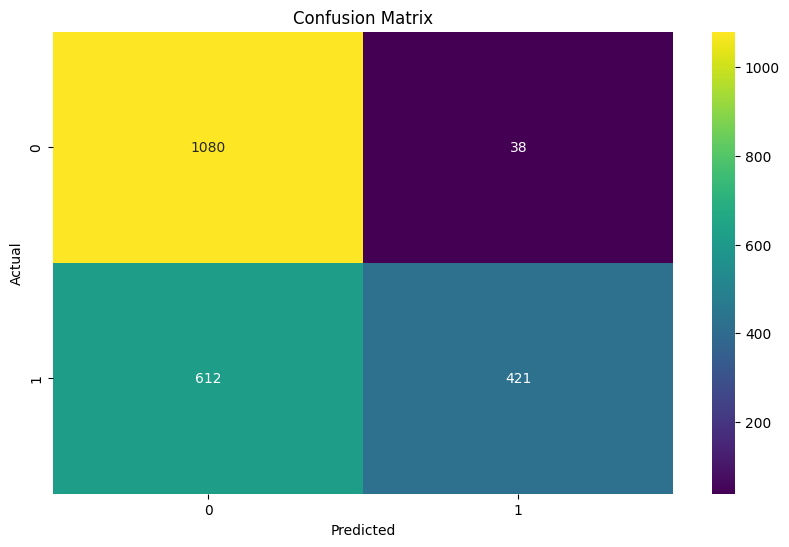

In [202]:
# plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Hyper Perameter Tunning**

In [203]:
# calling the random forest and adjusting the parameters
model = RandomForestClassifier(
    n_estimators=150,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=10,  # Minimum samples required to split an internal node
    min_samples_leaf=5,    # Minimum samples required to be at a leaf node
    max_features=5,        # Number of features to consider when looking for the best split
    criterion='entropy',   # Splitting criterion
    random_state=42
)

# fitting the model
model.fit(X_train, y_train)

# calculating the train and test accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# printing the train and test accuracy
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")

Train accuracy: 0.7296511627906976
Test accuracy: 0.694560669456067
